<a href="https://colab.research.google.com/github/IzabelaMarina/Projetos-Turing-Academy/blob/main/Projeto1TA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limpeza e análise de dados referentes às olímpiadas até 2016



In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


df = pd.read_csv('/df_athlete_events.csv') #lendo o arquivo com os dados

df.head() #verificando se a leitura foi bem sucedida e como está organizado o dataset 

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
1,6,Per Knut Aaland,M,31.0,188.0,75.0,United States,USA,1992 Winter,1992,Winter,Albertville,Cross Country Skiing,Cross Country Skiing Men's 10/15 kilometres Pu...,NaN
2,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze
3,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze
4,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze


In [5]:
df.info() #coletando informações adicionais sobre o dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45567 entries, 0 to 45566
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Athlete_ID  45567 non-null  int64  
 1   Name        45567 non-null  object 
 2   Sex         45567 non-null  object 
 3   Age         44594 non-null  float64
 4   Height      35547 non-null  float64
 5   Weight      34926 non-null  object 
 6   Team        45567 non-null  object 
 7   NOC         45567 non-null  object 
 8   Games       45567 non-null  object 
 9   Year        45567 non-null  int64  
 10  Season      45567 non-null  object 
 11  City        45567 non-null  object 
 12  Sport       45567 non-null  object 
 13  Event       45567 non-null  object 
 14  Medal       39804 non-null  object 
dtypes: float64(2), int64(2), object(11)
memory usage: 5.2+ MB


# Limpeza de dados categóricos

A limpeza do dataset será iniciada pelos dados categóricos, ou seja, aqueles que não são valores numéricos. 

Ex.: Gênero, País, Medalha, Estação etc.

1. O primeiro passo será mudar o tipo de dados atribuído à categoria 'Weight' (Peso). Pela tabela de informações o 'dtype' de 'Weight' é 'object', ou seja, ele estaria entre os dados categóricos, mas peso é um atributo numérico, portanto o 'dtype' de 'Weight' será alterado para 'float64', de forma que ele só passe a ser analisado na etapa seguinte desse projeto:

In [6]:
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce') # Muda o tipo dos dados para 'float64' e força os objetos que não podem virar números à condição de NaN 
df.dtypes

Athlete_ID      int64
Name           object
Sex            object
Age           float64
Height        float64
Weight        float64
Team           object
NOC            object
Games          object
Year            int64
Season         object
City           object
Sport          object
Event          object
Medal          object
dtype: object

2. O próximo passo é analisar os atributos dos dados categóricos em busca de possíveis incoerências: 

In [7]:
df.describe(include = ['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,45567,45567,45567,45567,45567,45567,45567,39804
unique,32905,6,602,201,51,5,43,66,760,4
top,"Michael Fred Phelps, II",M,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,31664,5515,5957,2321,38607,4091,4811,1379,13320


6 categorias em 'Sex', 5 em 'Season' e 4 em 'Medal' são sinais de incoerências: eram esperados apenas 2 categorias, cada, em 'Sex' e 'Season' e apenas 3 em 'Medal'.

Para resolver isso é preciso analisar especificamente as categorias descritas em cada uma dessas colunas, começando por 'Sex':

In [8]:
print("Classificações da coluna \'Sex\':" ) #descrição
print(pd.Series(df.Sex.unique()))

Classificações da coluna 'Sex':
0                          M
1                       MALE
2                     FEMALE
3                          F
4    Vic vai te dar um socao
5          P&D >> Comunidade
dtype: object


In [9]:
df["Sex"].replace("MALE","M",inplace = True) #As categorias "MALE" e "M" representam a mesma coisa, portanto toda linha categorizada como "MALE" passará a ser "M", para unificar as características.
df["Sex"].replace("FEMALE","F",inplace = True) #O mesmo é feito com "FEMALE" e "F"
print("Classificações da coluna \'Sex\':" )
print(pd.Series(df.Sex.unique()))

Classificações da coluna 'Sex':
0                          M
1                          F
2    Vic vai te dar um socao
3          P&D >> Comunidade
dtype: object


"Vic vai te dar um socao" e "P&D >> Comunidade" são classificações que não representam gêneros, portanto o passo seguinte é analisar as linhas que possuem esses valores para descobrir se há algo que possa ser feito para recuperar esses dados, começando por "Vic vai te dar um socao":

In [10]:
df[df['Sex'] == 'Vic vai te dar um socao']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
21,30,Pepijn Aardewijn,Vic vai te dar um socao,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
131,562,Pawe Abratkiewicz,Vic vai te dar um socao,27.0,183.0,84.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Speed Skating,Speed Skating Men's 500 metres,NaN
227,963,Derrick Ralph Adkins,Vic vai te dar um socao,26.0,188.0,80.0,United States,USA,1996 Summer,1996,Summer,Atlanta,Athletics,Athletics Men's 400 metres Hurdles,Gold
355,1435,Janne Petteri Ahonen,Vic vai te dar um socao,28.0,184.0,66.0,Finland,FIN,2006 Winter,2006,Winter,Torino,Ski Jumping,"Ski Jumping Men's Large Hill, Team",Silver
404,1555,Geard Ajetovi,Vic vai te dar um socao,19.0,170.0,67.0,Serbia and Montenegro,SCG,2000 Summer,2000,Summer,Sydney,Boxing,Boxing Men's Welterweight,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44407,132195,Yury Aleksandrovich Yakimov,Vic vai te dar um socao,23.0,186.0,80.0,Soviet Union,URS,1976 Summer,1976,Summer,Montreal,Rowing,Rowing Men's Quadruple Sculls,Silver
44542,132638,Dmitry Semyonovich Yaparov,Vic vai te dar um socao,28.0,186.0,86.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Cross Country Skiing,Cross Country Skiing Men's 4 x 10 kilometres R...,Silver
44739,133136,Yoshikatsu Yoshida,Vic vai te dar um socao,22.0,161.0,56.0,Japan,JPN,1964 Summer,1964,Summer,Tokyo,Wrestling,"Wrestling Men's Flyweight, Freestyle",Gold
44842,133512,Denys Serhiyovych Yurchenko,Vic vai te dar um socao,30.0,175.0,75.0,Ukraine,UKR,2008 Summer,2008,Summer,Beijing,Athletics,Athletics Men's Pole Vault,Bronze


A partir dessa visualização cria-se a hipótese de que os atletas nessa categoria de gênero competiram em esportes masculinos, se comprovada a hipótese, para esse projeto, seu gênero será considerado masculino.
Para testar a hipótese a palavra "Men's" será procurada na coluna 'Event' de cada atleta com classificação de gênero igual a "Vic vai te dar um socao":

In [11]:
df_sex_socao = df[df['Sex']=='Vic vai te dar um socao']
for index in df_sex_socao.index: #percorre todas as linhas cujo valor da coluna 'Sex' é 'Vic vai te dar um socao'
  evento=df_sex_socao.loc[index,'Event'] #guarda o valor da coluna 'Event' no índice especificado
  if evento.find("Men's") != -1: #procura a palavra "Men's" no valor guardado
    df.loc[index,'Sex'] = "M" #se a palavra for encontrada o valor de 'Sex' é substituído por 'M'
print("Classificações da coluna \'Sex\':" )
print(pd.Series(df.Sex.unique()))


Classificações da coluna 'Sex':
0                          M
1                          F
2          P&D >> Comunidade
3    Vic vai te dar um socao
dtype: object


A classificação ainda existe, portanto será necessário visualizar quais casos não foram cobertos pela hipótese criada:

In [12]:
df[df['Sex'] == 'Vic vai te dar um socao']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
959,3864,"Thomas James ""Tom"" Anderson",Vic vai te dar um socao,33.0,183.0,89.0,Australia,AUS,1972 Summer,1972,Summer,Munich,Sailing,Sailing Mixed Three Person Keelboat,Gold
1837,6748,Klaus Baard Baess,Vic vai te dar um socao,23.0,NaN,NaN,Snap,DEN,1948 Summer,1948,Summer,London,Sailing,Sailing Mixed Three Person Keelboat,Bronze
2537,9041,Colin Kenneth Beashel,Vic vai te dar um socao,36.0,181.0,87.0,Australia,AUS,1996 Summer,1996,Summer,Atlanta,Sailing,Sailing Mixed Two Person Keelboat,Bronze
2920,10128,"Stephen DeLancey ""Steve"" Benjamin",Vic vai te dar um socao,28.0,175.0,59.0,United States,USA,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Two Person Dinghy,Silver
3599,12095,Henrik Blakskjr,Vic vai te dar um socao,29.0,194.0,90.0,Denmark,DEN,2000 Summer,2000,Summer,Sydney,Sailing,Sailing Mixed Three Person Keelboat,Gold
4899,15774,Pierre mile Ernest Brunet,Vic vai te dar um socao,29.0,168.0,NaN,France,FRA,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Mixed Pairs,Gold
5438,17391,"Stephen ""Steve"" Calder",Vic vai te dar um socao,26.0,204.0,96.0,Canada,CAN,1984 Summer,1984,Summer,Los Angeles,Sailing,Sailing Mixed Three Person Keelboat,Bronze
8721,28332,Christian Dick,Vic vai te dar um socao,36.0,NaN,NaN,Fornebo,NOR,1920 Summer,1920,Summer,Antwerpen,Sailing,Sailing Mixed 7 metres,Silver
10253,32894,John Filip Ericson,Vic vai te dar um socao,29.0,NaN,NaN,Kitty-1,SWE,1912 Summer,1912,Summer,Stockholm,Sailing,Sailing Mixed 10 metres,Gold
10939,34909,Johan Martin Ferner (Jacobsen-),Vic vai te dar um socao,24.0,NaN,NaN,Elisabeth X,NOR,1952 Summer,1952,Summer,Helsinki,Sailing,Sailing Mixed 6 metres,Silver


Os poucos atletas que sobraram e não participam de eventos explicitamente masculinos ou femininos possuem nomes masculinos, portanto será feita um substitução de valores 'Vic vai te dar um socao' por valores 'M': 

In [13]:
df["Sex"].replace("Vic vai te dar um socao","M",inplace = True)
print(pd.Series(df.Sex.unique()))

0                    M
1                    F
2    P&D >> Comunidade
dtype: object


O mesmo processo será realizado para 'P&D >> Comunidade':



In [14]:
df[df['Sex']=='P&D >> Comunidade']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
365,1467,Mara Magdalena Aicega Amicarelli,P&D >> Comunidade,34.0,165.0,60.0,Argentina,ARG,2008 Summer,2008,Summer,Beijing,Hockey,Hockey Women's Hockey,Bronze
399,1546,Eirini Andili,P&D >> Comunidade,17.0,167.0,45.0,Greece,GRE,2000 Summer,2000,Summer,Sydney,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Bronze
432,1639,Albina Khamitovna Akhatova,P&D >> Comunidade,29.0,160.0,55.0,Russia,RUS,2006 Winter,2006,Winter,Torino,Biathlon,Biathlon Women's 4 x 6 kilometres Relay,Gold
496,2210,Marina Alabau Neira,P&D >> Comunidade,26.0,164.0,55.0,Spain,ESP,2012 Summer,2012,Summer,London,Sailing,Sailing Women's Windsurfer,Gold
552,2464,Jo Qesem Ayela Aleh,P&D >> Comunidade,30.0,171.0,58.0,New Zealand,NZL,2016 Summer,2016,Summer,Rio de Janeiro,Sailing,Sailing Women's Two Person Dinghy,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44893,133635,"Claudia Hildegard Zaczkiewicz (Reidick-, -Reid...",P&D >> Comunidade,26.0,170.0,57.0,West Germany,FRG,1988 Summer,1988,Summer,Seoul,Athletics,Athletics Women's 100 metres Hurdles,Bronze
45021,134077,Nataliya Borisovna Zasulskaya,P&D >> Comunidade,23.0,190.0,95.0,Unified Team,EUN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Women's Basketball,Gold
45103,134294,Martina Zellner (-Seidl),P&D >> Comunidade,23.0,169.0,62.0,Germany,GER,1998 Winter,1998,Winter,Nagano,Biathlon,Biathlon Women's 4 x 7.5 kilometres Relay,Gold
45187,134531,Zhang Ping,P&D >> Comunidade,22.0,187.0,73.0,China,CHN,2004 Summer,2004,Summer,Athina,Volleyball,Volleyball Women's Volleyball,Gold


A hipótese testada dessa vez é a de que os atletas com essa classificação foram considerados como pertencentes ao gênero feminino no contexto das olímpiadas:

In [15]:
df_sex_PeD = df[df['Sex']=='P&D >> Comunidade']
for index in df_sex_PeD.index:
  evento=df_sex_PeD.loc[index,'Event']
  if evento.find("Women") != -1:
    df.loc[index,'Sex'] = "F"
print("Classificações da coluna \'Sex\':" )
print(pd.Series(df.Sex.unique()))

Classificações da coluna 'Sex':
0                    M
1                    F
2    P&D >> Comunidade
dtype: object


In [16]:
df[df['Sex']=='P&D >> Comunidade']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2582,9154,Laura Bechtolsheimer (-Tomlinson),P&D >> Comunidade,27.0,169.0,56.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Dressage, Individual",Bronze
2751,9561,Tanith Jessica Louise Belbin,P&D >> Comunidade,21.0,167.0,52.0,United States-1,USA,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Silver
4903,15776,Andre Marguerite Blanche Brunet-Joly,P&D >> Comunidade,30.0,165.0,NaN,France,FRA,1932 Winter,1932,Winter,Lake Placid,Figure Skating,Figure Skating Mixed Pairs,Gold
7915,25713,Meryl Elizabeth Davis,P&D >> Comunidade,23.0,160.0,49.0,United States-1,USA,2010 Winter,2010,Winter,Vancouver,Figure Skating,Figure Skating Mixed Ice Dancing,Silver
13717,43025,"Oksana Vladimirovna ""Pasha"" Grishchuk",P&D >> Comunidade,26.0,164.0,50.0,Russia-1,RUS,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Ice Dancing,Gold
16459,50501,Olena Eduardivna Hrushyna (-Honcharova-),P&D >> Comunidade,31.0,168.0,52.0,Ukraine-1,UKR,2006 Winter,2006,Winter,Torino,Figure Skating,Figure Skating Mixed Ice Dancing,Bronze
19026,58265,Oksana Borisovna Kazakova,P&D >> Comunidade,22.0,158.0,48.0,Russia-1,RUS,1998 Winter,1998,Winter,Nagano,Figure Skating,Figure Skating Mixed Pairs,Gold
22807,68693,Karen Lende O'Connor,P&D >> Comunidade,42.0,168.0,55.0,United States,USA,2000 Summer,2000,Summer,Sydney,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Bronze
31229,94284,Yelena Vladimirovna Petushkova (-Brumel-),P&D >> Comunidade,27.0,160.0,65.0,Soviet Union,URS,1968 Summer,1968,Summer,Mexico City,Equestrianism,"Equestrianism Mixed Dressage, Team",Silver
31320,94497,Zara Anne Elizabeth Phillips (-Tindall),P&D >> Comunidade,31.0,1879291.0,64.0,Great Britain,GBR,2012 Summer,2012,Summer,London,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Silver


Analogamente ao caso anterior, os poucos atletas que sobraram possuem nomes femininos, com exceção de Andrée Brunet, que pode causar certa confusão, mas com pesquisa rápida é possível descobrir que Andrée também é do gênero feminino.
A estratégia adotada para esse caso é mesma adotada anteriormente:

In [17]:
df["Sex"].replace("P&D >> Comunidade","F",inplace = True)
print(pd.Series(df.Sex.unique()))

0    M
1    F
dtype: object


As classificações da coluna 'Sex' foram resolvidas. Processos semelhantes serão utilizados para tratar o caso da coluna 'Season', desta vez buscando inferir a estação do ano a partir da coluna 'Games':

In [18]:
print("Classificações da coluna \'Season\':" )
print(pd.Series(df.Season.unique()))

Classificações da coluna 'Season':
0            Summer
1            Winter
2    #ForaBolsonaro
3         Ele nunca
4           Ele não
dtype: object


In [19]:
df[df['Season']=='#ForaBolsonaro']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
1141,4359,va Angyal,F,21.0,163.0,63.0,#ForaBolsonaro,HUN,1976 Summer,1976,#ForaBolsonaro,Montreal,Handball,Handball Women's Handball,Bronze
1701,6299,Yelena Yuryevna Azarova,F,31.0,165.0,64.0,#ForaBolsonaro,RUS,2004 Summer,2004,#ForaBolsonaro,Athina,Synchronized Swimming,Synchronized Swimming Women's Team,Gold
2626,9250,Gudrun Beckmann,F,17.0,174.0,62.0,#ForaBolsonaro,FRG,1972 Summer,1972,#ForaBolsonaro,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Bronze
3232,11047,"Janice ""Jan"" Betker",F,37.0,167.0,64.0,#ForaBolsonaro,CAN,1998 Winter,1998,#ForaBolsonaro,Nagano,Curling,Curling Women's Curling,Gold
3583,12054,Bonnie Kathleen Blair (-Cruikshank),F,29.0,165.0,59.0,#ForaBolsonaro,USA,1994 Winter,1994,#ForaBolsonaro,Lillehammer,Speed Skating,Speed Skating Women's 500 metres,Gold
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43848,130667,Serena Jamika Williams,F,30.0,175.0,70.0,#ForaBolsonaro,USA,2012 Summer,2012,#ForaBolsonaro,######,Tennis,Tennis Women's Doubles,Gold
43891,130759,"Helen Newington Wills (-Moody, -Roark)",F,18.0,NaN,NaN,#ForaBolsonaro,USA,1924 Summer,1924,#ForaBolsonaro,Paris,Tennis,Tennis Women's Singles,Gold
44051,131184,"Jeanette Josephina Maria ""Nettie"" Witziers-Timmer",F,25.0,NaN,NaN,#ForaBolsonaro,NED,1948 Summer,1948,#ForaBolsonaro,London,Athletics,Athletics Women's 4 x 100 metres Relay,Nelson
44531,132574,Yang Yun,F,15.0,158.0,40.0,#ForaBolsonaro,CHN,2000 Summer,2000,#ForaBolsonaro,Sydney,Gymnastics,Gymnastics Women's Uneven Bars,Bronze


A partir dessa visualização já é possível perceber que as duas estações precisarão ser levadas em conta nesse caso:

In [20]:
df_season_fora = df[df['Season']=='#ForaBolsonaro']
for index in df_season_fora.index:
  evento=df_season_fora.loc[index,'Games']
  if evento.find("Summer") != -1:
    df.loc[index,'Season'] = "Summer"
  if evento.find("Winter") != -1:
    df.loc[index,'Season'] = "Winter"
print("Classificações da coluna \'Season\':" )
print(pd.Series(df.Season.unique()))

Classificações da coluna 'Season':
0       Summer
1       Winter
2    Ele nunca
3      Ele não
dtype: object


In [21]:
df[df['Season']=='Ele nunca']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2371,8590,Suzy Batkovic (-Brown),F,23.0,195.0,89.0,Australia,AUS,2004 Summer,2004,Ele nunca,Athina,Basketball,Basketball Women's Basketball,Silver
2831,9778,Lyudmila Yevgenevna Belousova (-Protopopova),F,32.0,160.0,46.0,Soviet Union-1,URS,1968 Winter,1968,Ele nunca,Grenoble,Figure Skating,Figure Skating Mixed Pairs,Gold
3338,11416,Laryssa Biesenthal,F,25.0,173.0,NaN,Canada,CAN,1996 Summer,1996,Ele nunca,Atlanta,Rowing,Rowing Women's Quadruple Sculls,Bronze
3559,11995,Julie Lynne Black-Burns Richards,F,33.0,170.0,54.0,United States,USA,2004 Summer,2004,Ele nunca,Athina,Equestrianism,"Equestrianism Mixed Three-Day Event, Team",Bronze
6279,20315,Chen Ying,F,30.0,164.0,67.0,China,CHN,2008 Summer,2008,Ele nunca,Beijing,Shooting,"Shooting Women's Sporting Pistol, 25 metres",Gold
10610,33846,Marinella Falca,F,18.0,167.0,50.0,Italy,ITA,2004 Summer,2004,Ele nunca,Athina,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver
12987,40821,Lidiya Timofeyevna Glubokova,F,26.0,158.0,NaN,Soviet Union,URS,1980 Summer,1980,Ele nunca,Moskva,Hockey,Hockey Women's Hockey,Bronze
13161,41385,Svetlana Valentinovna Goncharenko (Doronina-),F,29.0,173.0,63.0,Russia,RUS,2000 Summer,2000,Ele nunca,Sydney,Athletics,Athletics Women's 4 x 400 metres Relay,Bronze
14815,45978,Kelly Hardie,F,38.0,182.0,80.0,Australia,AUS,2008 Summer,2008,Ele nunca,Beijing,Softball,Softball Women's Softball,Bronze
16396,50335,Denean Elizabeth Howard-Hill,F,23.0,165.0,55.0,United States,USA,1988 Summer,1988,Ele nunca,Seoul,Athletics,Athletics Women's 4 x 400 metres Relay,Silver


In [22]:
df_season_nunca = df[df['Season']=='Ele nunca']
for index in df_season_nunca.index:
  evento=df_season_nunca.loc[index,'Games']
  if evento.find("Summer") != -1:
    df.loc[index,'Season'] = "Summer"
  if evento.find("Winter") != -1:
    df.loc[index,'Season'] = "Winter"
print("Classificações da coluna \'Season\':" )
print(pd.Series(df.Season.unique()))

Classificações da coluna 'Season':
0     Summer
1     Winter
2    Ele não
dtype: object


In [23]:
df[df['Season']=='Ele não']

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
2568,9111,Anna Rose Bebington-Watkins,F,25.0,183.0,78.0,Great Britain,GBR,2008 Summer,2008,Ele não,Beijing,Rowing,Rowing Women's Double Sculls,Bronze
6482,21158,Chou Tao,F,20.0,174.0,56.0,China,CHN,2008 Summer,2008,Ele não,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Silver
7011,22867,"Althea Kristina ""Tina"" Cook (Gifford-)",F,37.0,175.0,71.0,Great Britain,GBR,2008 Summer,2008,Ele não,Beijing,Equestrianism,"Equestrianism Mixed Three-Day Event, Individual",Bronze
7262,23613,Natalya Coyle,F,21.0,170.0,60.0,Ireland,IRL,2012 Summer,2012,Ele não,London,Modern Pentathlon,Modern Pentathlon Women's Individual,NaN
7871,25620,Georgia Beth Davies,F,25.0,175.0,64.0,Great Britain,GBR,2016 Summer,2016,Ele não,Rio de Janeiro,Swimming,Swimming Women's 100 metres Backstroke,NaN
7983,25836,Mara Silvina D'Elia,F,26.0,173.0,69.0,Argentina,ARG,2012 Summer,2012,Ele não,London,Hockey,Hockey Women's Hockey,Silver
8327,27060,Julie Bndicte Deiters,F,25.0,165.0,60.0,Netherlands,NED,2000 Summer,2000,Ele não,Sydney,Hockey,Hockey Women's Hockey,Bronze
9144,29394,Yordanka Lyubchova Donkova,F,30.0,175.0,67.0,Bulgaria,BUL,1992 Summer,1992,Ele não,Barcelona,Athletics,Athletics Women's 100 metres Hurdles,Bronze
9828,31360,"Jessica Jane ""Jess"" Eddie",F,31.0,178.0,NaN,Great Britain,GBR,2016 Summer,2016,Ele não,Rio de Janeiro,Rowing,Rowing Women's Coxed Eights,Silver
9857,31461,Sonja Viola Edstrm-Ruthstrm,F,25.0,NaN,NaN,Sweden,SWE,1956 Winter,1956,Ele não,Cortina d'Ampezzo,Cross Country Skiing,Cross Country Skiing Women's 10 kilometres,Bronze


In [24]:
df_season_não = df[df['Season']=='Ele não']
for index in df_season_não.index:
  evento=df_season_não.loc[index,'Games']
  if evento.find("Summer") != -1:
    df.loc[index,'Season'] = "Summer"
  if evento.find("Winter") != -1:
    df.loc[index,'Season'] = "Winter"
print("Classificações da coluna \'Season\':" )
print(pd.Series(df.Season.unique()))

Classificações da coluna 'Season':
0    Summer
1    Winter
dtype: object


No caso das medalhas nenhuma outra coluna permite inferir o valor original, portanto a estratégia adotada será diferente:

In [25]:
print("Classificações da coluna \'Medal\':" )
print(pd.Series(df.Medal.unique()))

Classificações da coluna 'Medal':
0      Gold
1       NaN
2    Bronze
3    Silver
4    Nelson
dtype: object


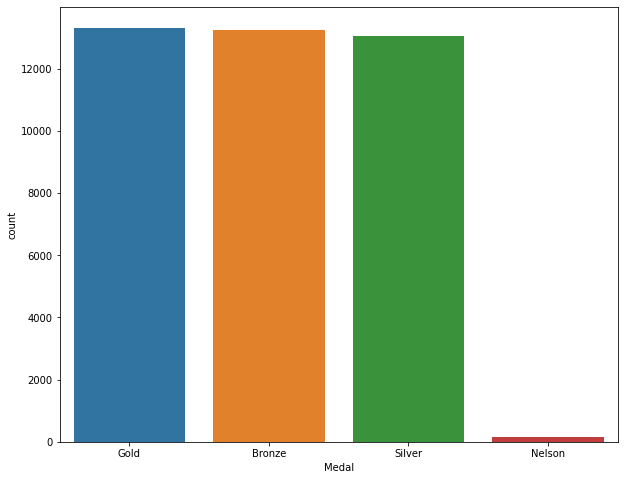

In [26]:
plt.figure(figsize=(10,8))
sns.countplot(x='Medal', data = df)
plt.show()

O número de medalhas de ouro, bronze e prata deveriam ser semelhantes ou pelo menos muito próximos, consideradas situações excepcionais. O número de medalhas 'Nelson' parece ser a porção de medalhas faltantes na categoria 'Silver' (prata) para que ela esteja próxima às demais categorias, portanto a estratégia adotada será substituir as medalhas 'Nelson' por medalhas 'Silver':

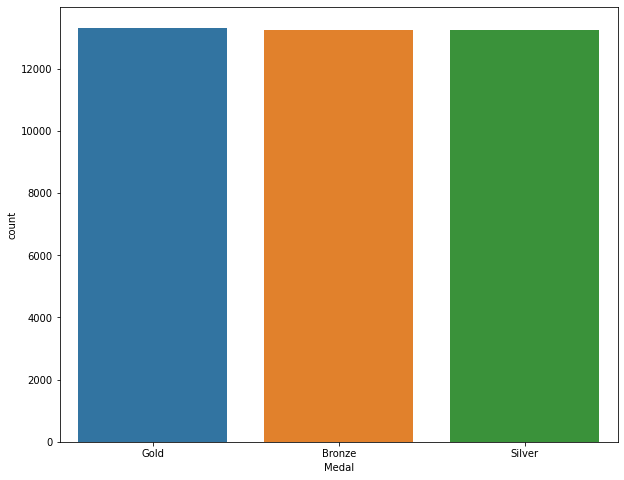

In [27]:
df["Medal"].replace("Nelson","Silver",inplace = True)
plt.figure(figsize=(10,8))
sns.countplot(x='Medal', data = df)
plt.show()

;)

Agora será feito o tratamento dos dados nulos:

In [28]:
df.isnull().sum() #identifica os dados nulos

Athlete_ID        0
Name              0
Sex               0
Age             973
Height        10020
Weight        11141
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal          5763
dtype: int64

O único conjunto de dados categóricos com valores nulos é o de medalhas e nesse caso os valores nulos representam atletas não premiados. Será feita uma substituição de valores com o único fim de deixar o dataset mais autoexplicativo:

In [29]:
df.update(df['Medal'].fillna('Sem medalha')) #Substitui os valores nulos pelo valor "Sem medalha"
df.isnull().sum()

Athlete_ID        0
Name              0
Sex               0
Age             973
Height        10020
Weight        11141
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
dtype: int64

# Limpeza de dados numéricos

Tal qual foi feito para dados categóricos, inicialmente o método describe será utilizado em busca de possíveis incoerências:

In [30]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,3.554700e+04,34426.000000,45567.000000
mean,69129.286282,25.851348,9.729939e+02,73.482450,1972.391094
std,38866.485546,5.966053,3.446781e+04,14.977912,94.200678
min,4.000000,10.000000,1.320000e+02,28.000000,-2992.000000
25%,36105.500000,22.000000,1.700000e+02,63.000000,1952.000000
50%,68634.000000,25.000000,1.780000e+02,72.000000,1984.000000
75%,103181.000000,29.000000,1.850000e+02,82.000000,2002.000000
max,135563.000000,73.000000,1.976779e+06,214.000000,2016.000000


Valores de ano menores do que 1896 (ano de realização da primeira olímpiada moderna) merecem investigação:

In [31]:
df[df['Year'] < 1896]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
20,29,Willemien Aardenburg,F,22.0,NaN,NaN,Netherlands,NED,1988 Summer,-134,Summer,Seoul,Hockey,Hockey Women's Hockey,Bronze
21,30,Pepijn Aardewijn,M,26.0,189.0,72.0,Netherlands,NED,1996 Summer,-765,Summer,Atlanta,Rowing,Rowing Men's Lightweight Double Sculls,Silver
22,37,Ann Kristin Aarnes,F,23.0,182.0,64.0,Norway,NOR,1996 Summer,-182,Summer,Atlanta,Football,Football Women's Football,Bronze
236,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,-1421,Summer,Stockholm,Diving,Diving Men's Platform,Gold
237,977,Erik William Adlerz,M,19.0,NaN,NaN,Sweden,SWE,1912 Summer,-1246,Summer,Stockholm,Diving,Diving Men's Plain High,Gold
238,977,Erik William Adlerz,M,27.0,NaN,NaN,Sweden,SWE,1920 Summer,-2992,Summer,Antwerpen,Diving,Diving Men's Platform,Silver
239,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,-670,Summer,Beijing,Swimming,Swimming Women's 400 metres Freestyle,Gold
240,980,"Rebecca ""Becky"" Adlington",F,19.0,179.0,70.0,Great Britain,GBR,2008 Summer,-248,Summer,Beijing,Swimming,Swimming Women's 800 metres Freestyle,Gold
241,980,"Rebecca ""Becky"" Adlington",F,23.0,179.0,70.0,Great Britain,GBR,2012 Summer,-825,Summer,London,Swimming,Swimming Women's 400 metres Freestyle,Bronze
526,2349,Ebbe Gustav Bertil Albertsson (-Andersson),M,26.0,177.0,67.0,Sweden,SWE,1948 Summer,-2378,Summer,London,Athletics,"Athletics Men's 10,000 metres",Bronze


Para resolver isso a coluna 'Games' será utilizada para inferir o valor original do ano:

In [32]:
df_year_erro = df[df['Year'] < 1896]
for ano in range(1896,2017,2): #cobre os anos de 1986 a 2016 levando em conta as olímpiadas de verão e inverno (2 em 2 anos)
  for index in df_year_erro.index:
    game = df_year_erro.loc[index,'Games']
    if game.find(str(ano)) != -1: #verifica se o ano selecionado está presente na coluna 'Games'
      df.loc[index,'Year'] = ano #substitui o valor, caso a sentença acima seja verdadeira
df[df['Year'] < 1896]


,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


A coluna de alturas está apresentando um valor máximo extremamente incomum, valores acima dos 2,5 metros devem ser investigados:

In [33]:
df[df['Height'] > 250]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
82,367,Masashi Abe,M,28.0,1796909.0,64.0,Japan,JPN,1994 Winter,1994,Winter,Lillehammer,Nordic Combined,Nordic Combined Men's Team,Gold
83,371,Shinnosuke Abe,M,21.0,597740.0,91.0,Japan,JPN,2000 Summer,2000,Summer,Sydney,Baseball,Baseball Men's Baseball,Sem medalha
84,379,Addis Abebe,M,21.0,513464.0,50.0,Ethiopia,ETH,1992 Summer,1992,Summer,Barcelona,Athletics,"Athletics Men's 10,000 metres",Bronze
158,690,Chantal Achterberg,F,27.0,1436796.0,72.0,Netherlands,NED,2012 Summer,2012,Summer,London,Rowing,Rowing Women's Coxed Eights,Bronze
159,690,Chantal Achterberg,F,31.0,1156881.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
161,698,Paul Douglas Ackerley,M,27.0,1976779.0,68.0,New Zealand,NZL,1976 Summer,1976,Summer,Montreal,Hockey,Hockey Men's Hockey,Gold
499,2233,Noor Alam,M,26.0,1549598.0,73.0,Pakistan,PAK,1956 Summer,1956,Summer,Melbourne,Hockey,Hockey Men's Hockey,Silver
500,2233,Noor Alam,M,30.0,233157.0,73.0,Pakistan,PAK,1960 Summer,1960,Summer,Roma,Hockey,Hockey Men's Hockey,Gold
501,2235,Karim Alami,M,27.0,1196132.0,85.0,Morocco,MAR,2000 Summer,2000,Summer,Sydney,Tennis,Tennis Men's Singles,Sem medalha
4160,13683,Nataliya Serhivna Borysenko,F,28.0,259708.0,NaN,Ukraine,UKR,2004 Summer,2004,Summer,Athina,Handball,Handball Women's Handball,Bronze


Os valores discrepantes serão substituídos pela média das alturas que não incluem esses valores:

In [34]:
df_height_menor250 = df[df['Height'] < 250]
media = df_height_menor250['Height'].mean()
df_height_maior250 = df[df['Height'] > 250]
for index in df_height_maior250.index:
  df.loc[index,'Height'] = media
df[df['Height'] > 250]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal


Usando o describe para checar se os valores estão condizentes com a realidade:

In [35]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,44594.000000,35547.000000,34426.000000,45567.00000
mean,69129.286282,25.851348,177.218534,73.482450,1974.58279
std,38866.485546,5.966053,10.862522,14.977912,33.33507
min,4.000000,10.000000,132.000000,28.000000,1896.00000
25%,36105.500000,22.000000,170.000000,63.000000,1952.00000
50%,68634.000000,25.000000,178.000000,72.000000,1984.00000
75%,103181.000000,29.000000,184.000000,82.000000,2002.00000
max,135563.000000,73.000000,223.000000,214.000000,2016.00000


Voltando aos dados nulos:

In [36]:
df.isnull().sum()

Athlete_ID        0
Name              0
Sex               0
Age             973
Height        10020
Weight        11141
Team              0
NOC               0
Games             0
Year              0
Season            0
City              0
Sport             0
Event             0
Medal             0
dtype: int64

O tratamento de dados nulos para conjuntos de dados numéricos será feito substituindo-os pelas médias, para isso primeiro é preciso entender como está a distribuição dos dados:


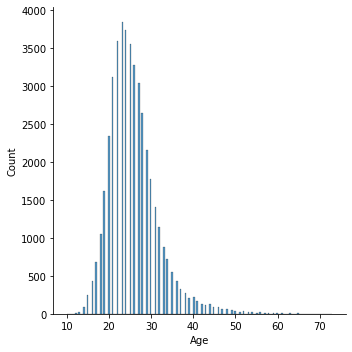

In [37]:
sns.displot(x = df['Age'].dropna())

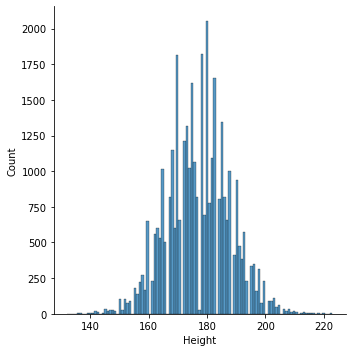

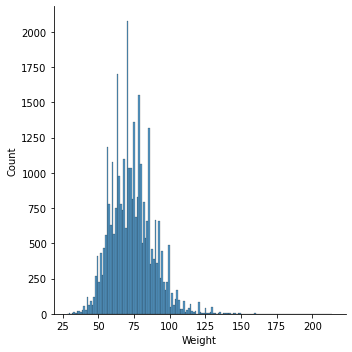

In [38]:
sns.displot(x = df['Height'].dropna())
sns.displot(x = df['Weight'].dropna())

A distribuição de idades parece bastante uma normal, mas quando se trata de altura e peso a distribuição tem uma aparência menos amigável, portanto esses atributos serão separados em gêneros:

Text(0.5, 6.79999999999999, 'Altura masculina')

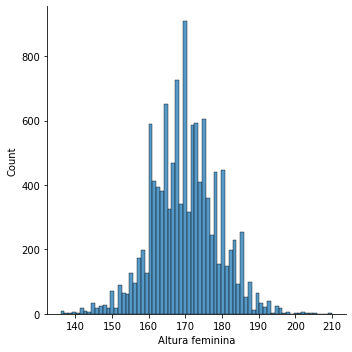

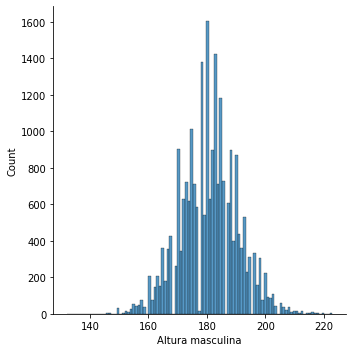

In [39]:
sns.displot(x = df[df['Sex'] == 'F']['Height'].dropna())
plt.xlabel("Altura feminina")
sns.displot(x = df[df['Sex'] == 'M']['Height'].dropna())
plt.xlabel("Altura masculina")

Text(0.5, 6.79999999999999, 'Peso masculino')

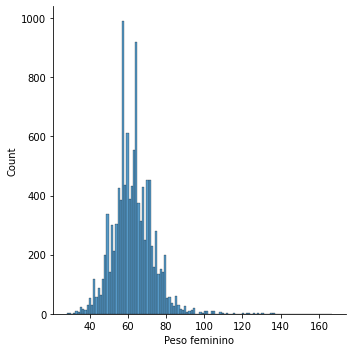

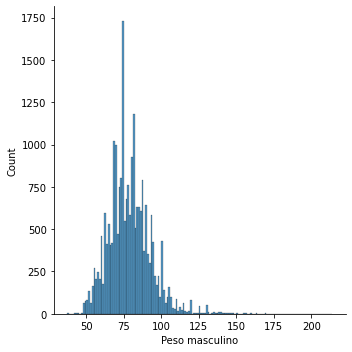

In [40]:
sns.displot(x = df[df['Sex'] == 'F']['Weight'].dropna())
plt.xlabel("Peso feminino")
sns.displot(x = df[df['Sex'] == 'M']['Weight'].dropna())
plt.xlabel("Peso masculino")

Começam então as substituições:

In [41]:
df.update(df['Age'].fillna(int(df['Age'].mean()))) #preenche os NaNs da idade com a média
#tenho mesmo que descrever isso aqui?
df_sex_f = df[df['Sex'] == "F"]
mediaf_altura = df_sex_f['Height'].mean() #media de altura feminina
mediaf_peso = df_sex_f['Weight'].mean() #media de peso feminino

df_sex_m = df[df['Sex'] == "M"]
mediam_altura = df_sex_m['Height'].mean() #media de altura masculina
mediam_peso = df_sex_m['Weight'].mean() #media de peso masculino

for index in df_sex_f.index: #percorre todas as linhas cujo valor de 'Sex' é 'F'
  if pd.isna(df_sex_f.loc[index,'Height']): #identifica se o valor de altura é nulo
    df.loc[index,'Height'] = mediaf_altura #se for substitui o valor pela média
  if pd.isna(df_sex_f.loc[index,'Weight']): #identifica se o valor de peso é nulo
    df.loc[index,'Weight'] = mediaf_peso #se for substitui pela média
#faz a mesma coisa que a porção anterior do código, mas para valores de 'Sex' iguais a 'M'
for index in df_sex_m.index:
  if pd.isna(df_sex_m.loc[index,'Height']):
    df.loc[index,'Height'] = mediam_altura
  if pd.isna(df_sex_m.loc[index,'Weight']):
    df.loc[index,'Weight'] = mediam_peso

df.isnull().sum()

Athlete_ID    0
Name          0
Sex           0
Age           0
Height        0
Weight        0
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal         0
dtype: int64

# Análise dos dados

Uma vez finalizada a limpeza, os dados começarão a ser analisados. 

Usando o método describe mais uma vez surgem algumas curiosidades interessantes:

In [42]:
df.describe(include = ['object'])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,45567,45567,45567,45567,45567,45567,45567,45567,45567,45567
unique,32905,2,602,201,51,2,43,66,760,4
top,"Michael Fred Phelps, II",M,United States,USA,2008 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,28,32741,5515,5957,2321,38732,4091,4811,1379,13320


In [43]:
df.describe()

,Athlete_ID,Age,Height,Weight,Year
count,45567.000000,45567.000000,45567.000000,45567.000000,45567.00000
mean,69129.286282,25.833169,177.780741,74.216678,1974.58279
std,38866.485546,5.903293,9.764476,13.364812,33.33507
min,4.000000,10.000000,132.000000,28.000000,1896.00000
25%,36105.500000,22.000000,171.000000,64.000000,1952.00000
50%,68634.000000,25.000000,180.000000,77.000000,1984.00000
75%,103181.000000,28.000000,182.000000,79.000000,2002.00000
max,135563.000000,73.000000,223.000000,214.000000,2016.00000


1. Michael Phelps é o atleta mais premiado entre todas as olimpíadas, verão e inverno, tendo competido em 28 jogos diferentes, com os seguintes resultados:

In [44]:
phelps = df['Name'] == 'Michael Fred Phelps, II'
gold = df['Medal'] == 'Gold'
silver = df['Medal'] == 'Silver'
bronze = df ['Medal'] == 'Bronze'
print('Ouros:', df[phelps & gold].shape[0]) # número de linhas com as especificações dadas
print('Pratas:', df[phelps & silver].shape[0])
print('Bronzes:', df[phelps & bronze].shape[0])

Ouros: 23
Pratas: 3
Bronzes: 2


(E o nome dele tem um II, tipo D. Pedro)

2. O atleta mais jovem a participar de uma olimpíada tinha 10 anos:

In [45]:
df[df['Age'] == 10]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
23896,71691,Dimitrios Loundras,M,10.0,180.796322,78.708528,Ethnikos Gymnastikos Syllogos,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Bronze


Ele era o grego Dimitrios Loundras, que foi medalhista de bronze nas barras paralelas da ginástica masculina nas olimpíadas de 1896 em Atenas, as primeiras olimpíadas modernas.

3. O atleta mais velho tinha 73 anos:

In [46]:
df[df['Age'] == 73]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
7061,22984,John (Herbert Crawford-) Copley (Williamson-),M,73.0,180.796322,78.708528,Great Britain,GBR,1948 Summer,1948,Summer,London,Art Competitions,"Art Competitions Mixed Painting, Graphic Arts",Silver


Era o britânico John Copley, medalhista de prata em uma competição artística, nas olímpiadas de Londres em 1948.

4. A idade média dos atletas é próxima dos 26 anos.
5. A altura média é de 1 metro e 77 centímetros e o peso médio é de 74 kg.
6. A atleta mais leve pesava 28 kg quando competiu: 

In [47]:
df[df['Weight'] == 28]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
42956,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Platform,Bronze
42957,128605,Wang Xin (Ruoxue-),F,15.0,137.0,28.0,China,CHN,2008 Summer,2008,Summer,Beijing,Diving,Diving Women's Synchronized Platform,Gold


É a chinesa Wang Xin, competidora de salto ornamental, que tinha esse peso aos 15 anos quando competiu nas olimpíadas de 2008 em Pequim

6. Apesar de também ser baixinha, Wang Xin não é a atleta mais baixa que já participou dos jogos, esse posto pertence ao omaniano Khamis Al-Subhi, que competiu nas olimpíadas de 1984 em Los Angeles como atirador.

In [48]:
df[df['Height'] == 132]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
494,2174,Khamis Mohamed Saif Al-Subhi,M,25.0,132.0,58.0,Oman,OMA,1984 Summer,1984,Summer,Los Angeles,Shooting,"Shooting Men's Air Rifle, 10 metres",Sem medalha


7. O atleta mais pesado é o judoca guatemalense Ricardo Blas Jr., competidor das olimpíadas de Londres 2012:

In [49]:
df[df['Weight'] == 214]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
3624,12177,"Ricardo Blas, Jr.",M,25.0,183.0,214.0,Guam,GUM,2012 Summer,2012,Summer,London,Judo,Judo Men's Heavyweight,Sem medalha


8. Os atletas mais altos, com surpreendentes 2 metros e 23 centímetros, foram os jogadores de basquete Tommy Burleson, dos Estados Unidos e Arvydas Sabonis, da Lituânia: 

In [50]:
df[df['Height'] == 223]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
5195,16639,Tommy Loren Burleson,M,20.0,223.0,102.0,United States,USA,1972 Summer,1972,Summer,Munich,Basketball,Basketball Men's Basketball,Silver
34509,104059,Arvydas Romas Sabonis,M,23.0,223.0,122.0,Soviet Union,URS,1988 Summer,1988,Summer,Seoul,Basketball,Basketball Men's Basketball,Gold
34510,104059,Arvydas Romas Sabonis,M,27.0,223.0,122.0,Lithuania,LTU,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,Bronze
34511,104059,Arvydas Romas Sabonis,M,31.0,223.0,122.0,Lithuania,LTU,1996 Summer,1996,Summer,Atlanta,Basketball,Basketball Men's Basketball,Bronze


Vejamos em quais anos foram disputadas as olimpíadas de verão e inverno:

In [51]:
print("Olimpíadas de verão:")
print(pd.Series(df[df['Season']=='Summer'].Year.unique()).sort_values())


Olimpíadas de verão:
28    1896
0     1900
22    1904
17    1906
25    1908
7     1912
1     1920
21    1924
26    1928
23    1932
16    1936
2     1948
3     1952
8     1956
19    1960
18    1964
27    1968
20    1972
24    1976
13    1980
14    1984
5     1988
15    1992
6     1996
10    2000
12    2004
4     2008
11    2012
9     2016
dtype: int64


In [52]:
print("Olimpíadas de inverno:")
print(pd.Series(df[df['Season']=='Winter'].Year.unique()).sort_values())

Olimpíadas de inverno:
7     1924
8     1928
21    1932
16    1936
20    1948
5     1952
17    1956
6     1960
19    1964
11    1968
13    1972
18    1976
14    1980
15    1984
10    1988
0     1992
2     1994
9     1998
3     2002
4     2006
12    2010
1     2014
dtype: int64


9. Outra curiosidade coberta pelo dataset é a de que houve uma olimpíada de verão num ano atípico: 1906. Com breve pesquisa é possível descobrir que se deu como comemoração dos 10 anos desde a primeira olimpíada, em 1896.

In [53]:
summer = df['Season'] == 'Summer'
novecentosESeis = df['Year'] == 1906
df[summer & novecentosESeis]

,Athlete_ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
56,139,"George ""Ioannis"" Abbot",M,25.0,180.796322,78.708528,Thessalonki-1,GRE,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Bronze
296,1208,Ioannis Agrimis,M,25.0,180.796322,78.708528,"Large boat, Central Naval Prep School ""Poros""-1",GRE,1906 Summer,1906,Summer,Athina,Rowing,Rowing Men's 17-Man Naval Rowing Boats,Gold
630,2756,Georgios Aliprantis,M,25.0,180.796322,78.708528,Greece,GRE,1906 Summer,1906,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold
889,3684,Aage Jrgen Christian Andersen,M,22.0,180.796322,78.708528,Denmark,DEN,1906 Summer,1906,Summer,Athina,Football,Football Men's Football,Gold
898,3702,Carl Andersen,M,27.0,180.796322,78.708528,Denmark,DEN,1906 Summer,1906,Summer,Athina,Gymnastics,Gymnastics Men's Team All-Around,Silver
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45107,134322,Ladislav emla,M,18.0,180.796322,78.708528,Bohemia,BOH,1906 Summer,1906,Summer,Athina,Tennis,Tennis Men's Doubles,Bronze
45110,134323,Zdenk emla,M,25.0,180.796322,78.708528,Bohemia,BOH,1906 Summer,1906,Summer,Athina,Tennis,Tennis Men's Singles,Bronze
45111,134323,Zdenk emla,M,25.0,180.796322,78.708528,Bohemia,BOH,1906 Summer,1906,Summer,Athina,Tennis,Tennis Men's Doubles,Bronze
45446,135239,Khristos Zorbas,M,25.0,180.796322,78.708528,Greece,GRE,1906 Summer,1906,Summer,Athina,Fencing,"Fencing Men's Sabre, Team",Silver


10. Assim como não ocorreram olimpíadas nos anos de 1916 e 1940, por conta das primeira e segunda guerras mundiais, respectivamente.

11. E a diferença de 2 anos entre olimpíadas de inverno e verão só começou a existir a partir das olimpíadas de inverno de 1994, de 1924 a 1992 os eventos eram realizados nos mesmos anos.

# Gráficos

As análises agora serão feitas a partir de correlações expressadas em gráficos

Um heatmap permite visualizar os conjuntos de dados numéricos com maior correlação:

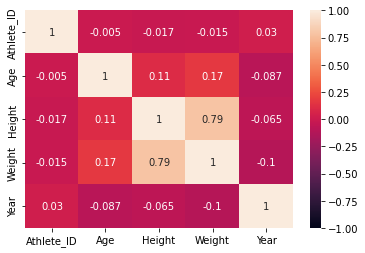

In [54]:
sns.heatmap(df.corr(), annot = True, vmin=-1, vmax=1)

No caso desse dataset os únicos conjuntos com correlação significativa são altura e peso. Não é um insight interessante, dado que é um resultado bastante intuitivo, além de pouco relacionado com o tema do dataset.

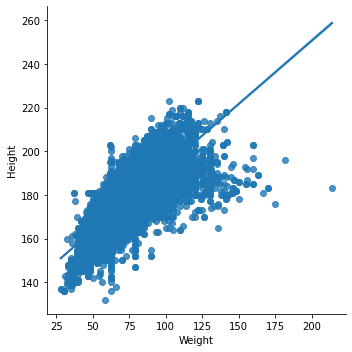

In [55]:
sns.lmplot(x='Weight',y='Height',data=df)

Ainda que seja a relação mais significativa do dataset, os pontos ocupam um largo intervalo em torno da reta de regressão linear do gráfico Peso x Altura e existem vários outliers, o que aponta uma grande variedade de tipos de corpos dentre os atletas olímpicos. Esse sim é um resultado interessante, uma vez que vai contra à ideia do corpo atlético único que é padrão de "saudabilidade".


Já que não existem mais correlações notáveis entre dados numéricos, os dados categóricos serão, agora, adicionados à análise. A visualização da distribuição de dados será o ponto de partida:

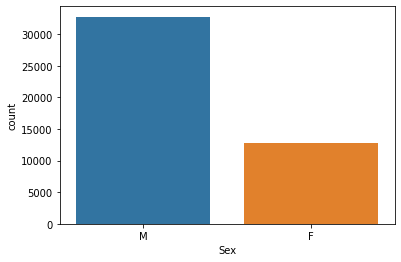

In [56]:
sns.countplot(x=df['Sex'])

A diferença de quantidade entre atletas do sexo feminino e do sexo masculino é, como esperada, muito grande. As modalidades femininas não foram introduzidas nas primeiras olimpíadas e até hoje, em nenhuma olimpíada, a porcentagem de atletas femininas chegou aos 50%.

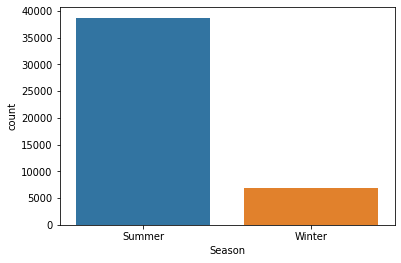

In [57]:
sns.countplot(x=df['Season'])

A diferença de entre estações também era esperada, uma vez que as olímpiadas de inverno são mais atuais e possuem menos modalidades.

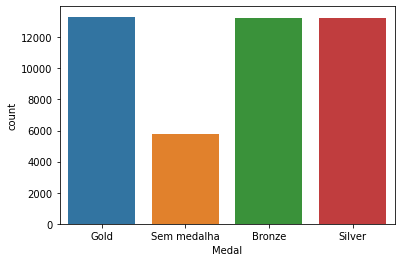

In [58]:
sns.countplot(x=df['Medal'])

Entretanto é preciso notar que este dataset não possui informações de todos os atletas participantes das olimpíadas, ele é focado nos medalhistas, caso contrário o número de participantes sem medalhas seria muito maior do que o apresentado.

# Busca de características específicas dos medalhistas

A fim de encontrar padrões entre os medalhistas será feita as distribuições dos dados numéricos que representam características físicas dos atletas separadas por categoria de medalhas:

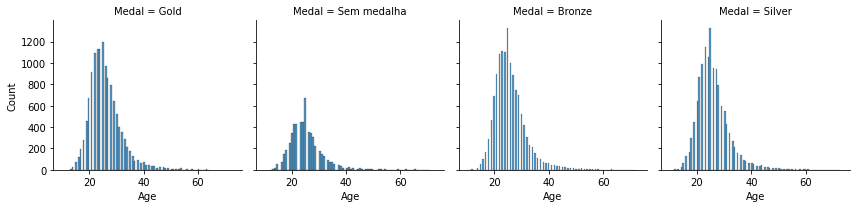

In [59]:
X = sns.FacetGrid(df,col='Medal')
X.map(sns.histplot,'Age')
plt.show()

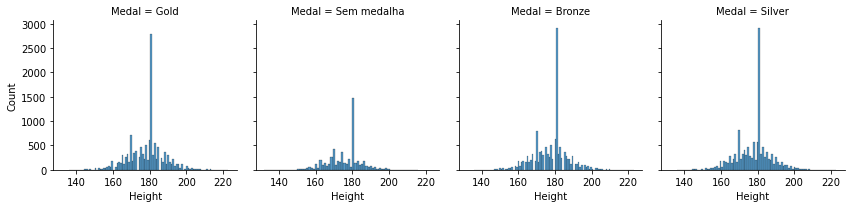

In [60]:
X = sns.FacetGrid(df,col='Medal')
X.map(sns.histplot,'Height')
plt.show()

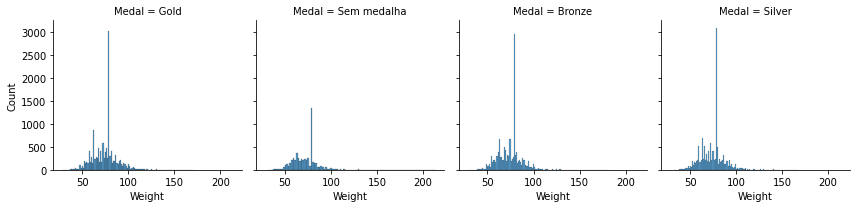

In [61]:
X = sns.FacetGrid(df,col='Medal')
X.map(sns.histplot,'Weight')
plt.show()

Vê-se que, de acordo com esse dataset, não há diferenças muito notáveis de peso, tamanho e idade entre os atetas medalhistas de ouro, prata, bronze ou até mesmo entre os não medalhistas. O que determina, portanto, os vencedores, parecem ser atributos mais sutis, talvez nem sempre ligados somente ao atleta.

# Conclusão

Após a limpeza do dataset foi possível identificar vários fatos interessantes sobre as olimpíadas ao longo da história, assim como traçar um perfil geral dos atletas. Descobriu-se que o peso e a altura dos competidores, apesar de serem distribuídos aproximadamente em uma normal, são bastante diversos, por exemplo, e que idade, peso e altura, não são suficientes para traçar um perfil determinante de campeões.

Outras análises, talvez com insights mais interessantes, seriam possíveis congregando dados com muitas categorias, como os nomes dos comitês olímpicos (201 diferentes), em categorias mais abrangentes, como continentes ou regiões do mundo por exemplo, já que as análises gráficas desses dados são muito confusas.

No mais, o dataset rendeu, no mínimo, bastante cultura inútil e informação para puxar assunto com alguém no bar :)